In [4]:
import pandas as pd
import statistics as st

In [5]:
resNuevos = pd.read_csv('/content/resultados_experimentos_modelo_nuevo_40clientes.csv')
resViejos = pd.read_csv('/content/resultados_experimentos_modelo_viejo_40clientes.csv')

In [6]:
tabla = pd.merge(resNuevos, resViejos, on = 'archivo')
tabla.head()

,archivo,status_x,valor_objetivo_x,tiempo_segundos_x,status_y,valor_objetivo_y,tiempo_segundos_y
0,instancia_0_40_clientes.txt,integer optimal solution,50004.0,8.737428,"integer optimal, tolerance",50004.0,1.539896
1,instancia_1_40_clientes.txt,"integer optimal, tolerance",37539.0,125.996328,"integer optimal, tolerance",55882.0,2.000715
2,instancia_2_40_clientes.txt,"integer optimal, tolerance",48623.0,1.173780,integer optimal solution,48623.0,0.997455
3,instancia_3_40_clientes.txt,"integer optimal, tolerance",53895.0,0.699697,"integer optimal, tolerance",53895.0,0.904926
4,instancia_4_40_clientes.txt,"integer optimal, tolerance",48805.0,13.491060,"integer optimal, tolerance",48805.0,5.639760


In [7]:
tpViejo = tabla.tiempo_segundos_y.mean()
tpExtra = tabla.tiempo_segundos_x.mean()

print("Tiempo promedio en resolver una instancia: ")
print(f"Modelo viejo: {tpViejo:.2f}s")
print(f"Modelo nuevo con restricciones extra: {tpExtra:.2f}s")
print(f"En promedio el modelo nuevo con restricciones extra tarda {(tpExtra/tpViejo -1)*100:.2f}% mas en resolver una instancia de 40 clientes que el modelo viejo")

Tiempo promedio en resolver una instancia: 
Modelo viejo: 12.63s
Modelo nuevo con restricciones extra: 365.76s
En promedio el modelo nuevo con restricciones extra tarda 2795.06% mas en resolver una instancia de 40 clientes que el modelo viejo


In [8]:
objE = tabla.valor_objetivo_x.mean()
objV = tabla.valor_objetivo_y.mean()
print(f"promedio valor objetivo -> modelo viejo: {objV}, modelo restricciones extra: {objE}")

print(f"El modelo nuevo con restricciones extra reduce el costo promedio en {100 -(objE*100)/objV:.2f} %")

promedio valor objetivo -> modelo viejo: 52003.66666666667, modelo restricciones extra: 48144.78571428588
El modelo nuevo con restricciones extra reduce el costo promedio en 7.42 %


#Graficos

In [9]:
# Agregar columna 'modelo'
resNuevos['modelo'] = 'nuevo'
resViejos['modelo'] = 'viejo'
#resNuevosSinExtra['modelo'] = 'nuevo_sin_extra'

# Unir todos en un único DataFrame
df = pd.concat([resNuevos, resViejos], ignore_index=True)

# Extraer cantidad de clientes si está en el nombre del archivo
df["cant_clientes"] = df["archivo"].str.extract(r'(\d+)_clientes').astype(float)

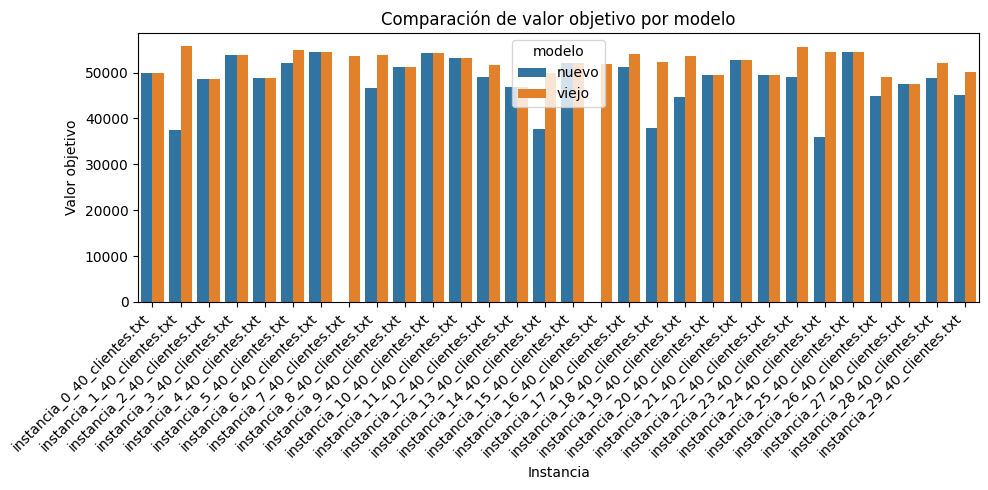

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data=df, x="archivo", y="valor_objetivo", hue="modelo")
plt.title("Comparación de valor objetivo por modelo")
plt.xlabel("Instancia")
plt.ylabel("Valor objetivo")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


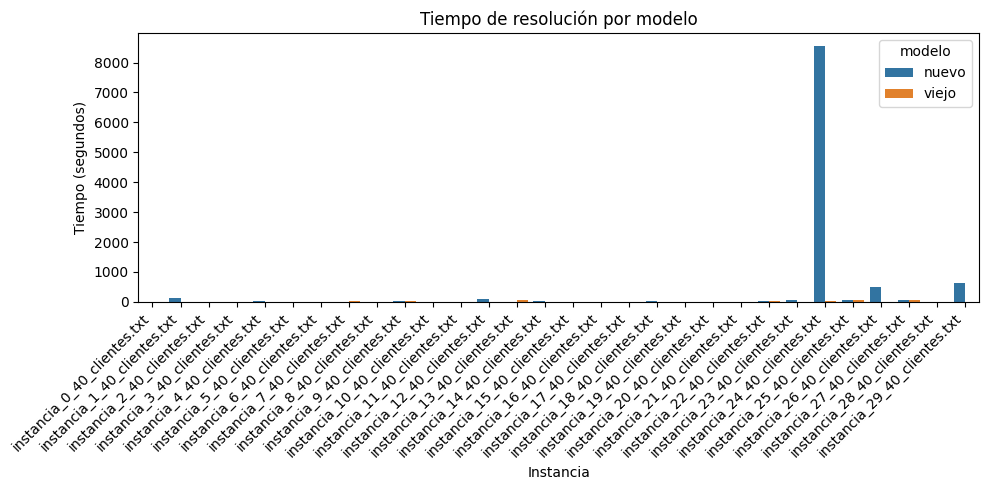

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="archivo", y="tiempo_segundos", hue="modelo")
plt.title("Tiempo de resolución por modelo")
plt.xlabel("Instancia")
plt.ylabel("Tiempo (segundos)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [20]:
def filtrar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    umbral_superior = Q3 + 1.5 * IQR
    umbral_inferior = Q1 - 1.5 * IQR
    df_filtrado = df[(df[columna] >= umbral_inferior) & (df[columna] <= umbral_superior)]
    return df_filtrado, (umbral_inferior, umbral_superior)

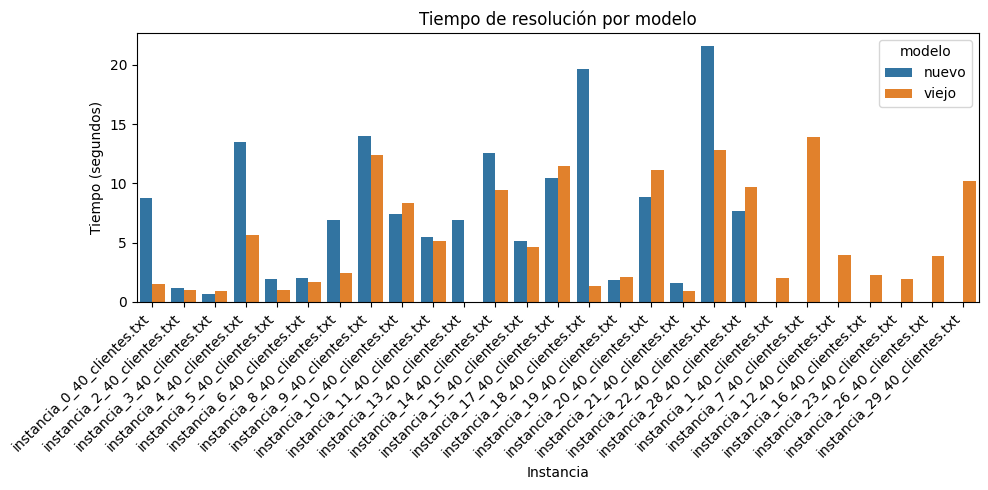

In [22]:
df_filtrado, (a,b) = filtrar_outliers_iqr(df, "tiempo_segundos")

plt.figure(figsize=(10,5))
sns.barplot(data=df_filtrado, x="archivo", y="tiempo_segundos", hue="modelo")
plt.title("Tiempo de resolución por modelo")
plt.xlabel("Instancia")
plt.ylabel("Tiempo (segundos)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()